In [1]:
# The magic commands below allow reflecting the changes in an imported module without restarting the kernel.
%load_ext autoreload
%autoreload 2


# !source /lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/bin/activate-nomodules && /lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/bin/python -m ipykernel install --user --name jhub_neurenev36

In [2]:
# We need to add balsam and the modules it depends on to the Python search paths. 
import sys
from pprint import pprint
import matplotlib.pyplot

In [3]:
sys.path.insert(0,'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/')
sys.path.insert(0,'/soft/datascience/Balsam/0.3.5.1/')

pprint(f'Python search path includes: {sys.path}')

# We also need postgresql to be in the path
import os
os.environ['PATH'] ='/soft/datascience/Balsam/0.3.5.1/env/bin/:' + os.environ['PATH']
os.environ['PATH'] +=':/soft/datascience/PostgreSQL/9.6.12/bin/'

try:
    import balsam
except:
    print('Cannot find balsam, make sure balsam is installed or it is available in Python search paths')    

("Python search path includes: ['/soft/datascience/Balsam/0.3.5.1/', "
 "'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/', "
 "'/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', "
 "'/opt/anaconda3/lib/python3.6/lib-dynload', '', "
 "'/opt/anaconda3/lib/python3.6/site-packages', "
 "'/opt/anaconda3/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg', "
 "'/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', "
 "'/gpfs/mira-home/rvescovi/.ipython']")


In [4]:
# We also need to activate Balsam database by setting the BALSAM_DB_PATH environment variable. 
# This is equivalent to `source balsamactivate jupyter_test` 
os.environ["BALSAM_DB_PATH"]='/lus/theta-fs0/projects/connectomics_aesp/ravescovi/balsam_db/'
print(os.environ["BALSAM_DB_PATH"])

/lus/theta-fs0/projects/connectomics_aesp/ravescovi/balsam_db/


In [25]:
##Building balsam app/job database based on the HappyNeurons applications.
from balsam_helper import *
import hpn_balsam_apps

Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app


In [26]:
from glob import glob
import os
import numpy as np

In [27]:
def check_folders (folder_list):
    for kfolder in folder_list:
        print(os.path.isdir(kfolder),kfolder)

def create_targets (target_path, folder_list,keyword='target'):
    list_size = len(folder_list)
    if (list_size==0):
        print ('No folders in folder_list')
        return 
    else:
        targets = []
        for k in np.arange(0,list_size):
            ktarget = os.path.join(target_path,keyword+'_'+str(k))
            targets.append(ktarget)
            os.makedirs(ktarget,exist_ok=True)
        return targets
    
        
def create_montage_list(folder_list, target_list, MIN=1000, MAX=2000,create_jobs=False, num_nodes=128, workflow=''):
    list_size =  (len(folder_list))
    target_size = (len(target_list))
    
    ##TODO Check sizes and existance..
#     if (list_size != target_size & target_size != 0):
#         print ('lists and targets must have the same size')
    
    for k in np.arange(0,list_size):
        print(k)
        RAW_INPUT=folder_list[k]
        PROCESS_FOLDER=os.path.join(RAW_INPUT,'montage_dir')
        TARGET_FOLDER =target_list[k]
        
        jobs = []
        if(create_jobs):
            job = hpn_balsam_apps.trakem_montage_job(workflow, RAW_INPUT, PROCESS_FOLDER,target=TARGET_FOLDER, min=MIN, max=MAX, num_nodes=num_nodes)
            jobs.append(job)
        else:
            print('Debug mode.......')
            print(RAW_INPUT, PROCESS_FOLDER, TARGET_FOLDER, MIN, MAX, workflow, num_nodes)
    return jobs

In [43]:
workflow = 'shuichi_full_montage_v1'

In [36]:
##create your montage folder lists. Keeping one list per sample will make it easier to merge it for the aligment step.

apex_folders = []
apex_folders.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_04_25_str_apex_long1/2019_04_25_str_apex_long1_data/2019_04_25_mousestr_long1_data/session_567000525/SectionSet4')
apex_folders.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_04_26_str_apex_long2/2019_04_26_str_apex_long2_data/session_1333526470/SectionSet3')
apex_folders.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_04_27_str_apex_long3/2019_04_28_str_apex_long4_data/session_206593860/SectionSet2')
apex_folders.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_05_17_str_apex_long5/2019_05_17_wafer5_apexstr_data/session_2045440704/SectionSet2')
apex_folders.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_05_19_str_apex_long6/2019_05_19_wafer6_data/session_2082297023/SectionSet2')
apex_folders.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_07_11_str_apex_long7/2019_07_11_wafer7/2019_07_wafer7str_data/session_40426180/SectionSet2')

target_path_apex = '/lus/theta-fs0/projects/connectomics_aesp/data/shuichi_apex_raf/raw_trakem_2/'



check_folders(apex_folders)
print(len(apex_folders))

apex_targets = create_targets(target_path_apex, apex_folders)
check_folders(apex_targets)
print(len(apex_targets))

jobs = create_montage_list(apex_folders, apex_targets, MIN=2000, MAX=4000, workflow=workflow,create_jobs=True, num_nodes=64)
print (jobs)

Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_04_25_str_apex_long1/2019_04_25_str_apex_long1_data/2019_04_25_mousestr_long1_data/session_567000525/SectionSet4
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_04_26_str_apex_long2/2019_04_26_str_apex_long2_data/session_1333526470/SectionSet3
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_04_27_str_apex_long3/2019_04_28_str_apex_long4_data/session_206593860/SectionSet2
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_05_17_str_apex_long5/2019_05_17_wafer5_apexstr_data/session_2045440704/SectionSet2
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_05_19_str_apex_long6/2019_05_19_wafer6_data/session_2082297023/Sec

In [37]:
octo_folders1 = []
octo_folders1.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_17_octsagseries_wafer1/2019_08_17_octsagseries_wafer1_data/session_60831710/SectionSet3')
octo_folders1.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_27_octsagseries_wafer2/2019_08_27_octsagseries_no2_data/session_84245782/SectionSet2')
octo_folders1.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_29_octsagseries_wafer3/2019_08_29_octsagseries_wafer3_data/session_911407996/SectionSet2')
octo_folders1.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_29_octsagseries_wafer4/2019_08_29_octsagseries_wafer4_data/session_204277640/SectionSet2')
octo_folders1.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_30_octsagseries_wafer5/2019_08_30_octsagseries_wafer5_data/session_1709006171/SectionSet2')
octo_folders1.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_30_octsagseries_wafer6/2019_08_30_octsagseries_wafer6_data/session_1342842437/SectionSet5')

target_octo1 = '/lus/theta-fs0/projects/connectomics_aesp/data/shuichi_octosag_raf/raw_trakem_2/'

check_folders(octo_folders1)
print(len(octo_folders1))

octo1_targets = create_targets(target_octo1, octo_folders1)
check_folders(octo1_targets)
print(len(octo1_targets))

jobs = create_montage_list(octo_folders1, octo1_targets, MIN=2000, MAX=4000, workflow=workflow,create_jobs=True, num_nodes=64)
print (jobs)

True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_17_octsagseries_wafer1/2019_08_17_octsagseries_wafer1_data/session_60831710/SectionSet3
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_27_octsagseries_wafer2/2019_08_27_octsagseries_no2_data/session_84245782/SectionSet2
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_29_octsagseries_wafer3/2019_08_29_octsagseries_wafer3_data/session_911407996/SectionSet2
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_29_octsagseries_wafer4/2019_08_29_octsagseries_wafer4_data/session_204277640/SectionSet2
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_30_octsagseries_wafer5/2019_08_30_octsagseries_wafer5_data/session_1709006171/SectionSet2
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_30_octsagseries_wafer6/2019_08_30_octsagseries_wafer6_data/session_1342842437/SectionSet5
6
True /lus/theta-fs0/projects/connectomics_aesp/data/shuichi_octosag_raf/raw_trakem_2/targ

In [38]:
octo_folders2 = []
octo_folders2.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_06_12_octvert_vshort/2019_waferoctvert_data/2019_waferoctvert_data/session_1269280956/SectionSet2')
octo_folders2.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_07_28_wafer_octvert_no2_high/2019_07_28_wafer_octvert_no2_high_data/session_1340428348/SectionSet2')
octo_folders2.append('/lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_11_wafer3_octvert3/2019_08_11_octver3_data/session_1125050526/SectionSet3')

target_octo2 = '/lus/theta-fs0/projects/connectomics_aesp/data/shuichi_octover_raf/raw_trakem_2/'



check_folders(octo_folders2)
print(len(octo_folders2))

octo2_targets = create_targets(target_octo2, octo_folders2)
check_folders(octo2_targets)
print(len(octo2_targets))

jobs = create_montage_list(octo_folders2, octo2_targets, MIN=2000, MAX=4000, workflow=workflow,create_jobs=True, num_nodes=64)
print (jobs)


True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_06_12_octvert_vshort/2019_waferoctvert_data/2019_waferoctvert_data/session_1269280956/SectionSet2
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_07_28_wafer_octvert_no2_high/2019_07_28_wafer_octvert_no2_high_data/session_1340428348/SectionSet2
True /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_08_11_wafer3_octvert3/2019_08_11_octver3_data/session_1125050526/SectionSet3
3
True /lus/theta-fs0/projects/connectomics_aesp/data/shuichi_octover_raf/raw_trakem_2/target_0
True /lus/theta-fs0/projects/connectomics_aesp/data/shuichi_octover_raf/raw_trakem_2/target_1
True /lus/theta-fs0/projects/connectomics_aesp/data/shuichi_octover_raf/raw_trakem_2/target_2
3
0
Input: /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_06_12_octvert_vshort/2019_waferoctvert_data/2019_waferoctvert_data/session_1269280956/SectionSet2
Output: /lus/theta-fs0/projects/connectomics_aesp/shuichi/2019_06_12_octvert_vshort/2019_waferoctv

In [39]:

#workflow = ''

submit(project='connectomics_aesp',
       queue='default',
       nodes=256,
       job_mode='mpi',
       wall_minutes=360,
       wf_filter=workflow)


Submit OK: Qlaunch {   'command': '/lus/theta-fs0/projects/connectomics_aesp/ravescovi/balsam_db/qsubmit/qlaunch7.sh',
    'from_balsam': True,
    'id': 7,
    'job_mode': 'mpi',
    'nodes': 256,
    'prescheduled_only': False,
    'project': 'connectomics_aesp',
    'queue': 'default',
    'scheduler_id': 383390,
    'state': 'submitted',
    'wall_minutes': 360,
    'wf_filter': 'shuichi_full_montage_v1'}


# BALSAM WORKFLOW ANALYZER

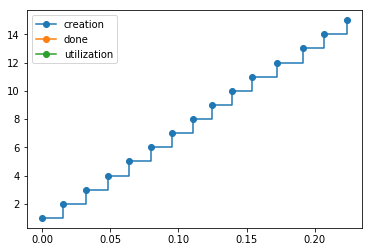

In [46]:
# Balsam metadata
from balsam.core.models import utilization_report, throughput_report, process_job_times, BalsamJob
from matplotlib import pyplot as plt

#workflow = "trakem2_test_v3"
##useful stuff
query = BalsamJob.objects.filter(workflow=workflow)
time_dat = process_job_times(query) #filters into a single workflow
[j.runtime_seconds for j in query] # full time per balsam Job

times_created, num_created = sorted(time_dat['CREATED']), range(1, len(time_dat["CREATED"])+1)

t0 = min(times_created)

def mins(t):
    return (t-t0).total_seconds() / 60

plt.step([mins(t) for t in times_created] ,num_created, 'o', where='post',label='creation')
times, num_thru = throughput_report(time_dat)
plt.step([mins(t) for t in times], num_thru,  'o', where='post', label='done')

times_u, num_util = utilization_report(time_dat)
plt.step([mins(t) for t in times_u], num_util, 'o', where='post', label='utilization')
plt.legend()

In [48]:
hpn.init(config)

NameError: name 'hpn' is not defined

In [ ]:
config = aligntk , fiji, 